In [1]:
import pandas as pd
df = pd.read_csv("datasets/winequality-red.csv")

In [2]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
quality_maping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}
df.loc[:,'quality'] = df.quality.map(quality_maping)

In [4]:
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.head(1000)

df_test = df.tail(599)

In [5]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)

cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'sulphates',
    'alcohol'
]

In [6]:
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
train_predictions = clf.predict(df_train[cols])

test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
print("training accuracy : ", train_accuracy)
print ("testing accuracy : ", test_accuracy)

training accuracy :  0.604
testing accuracy :  0.5575959933222037


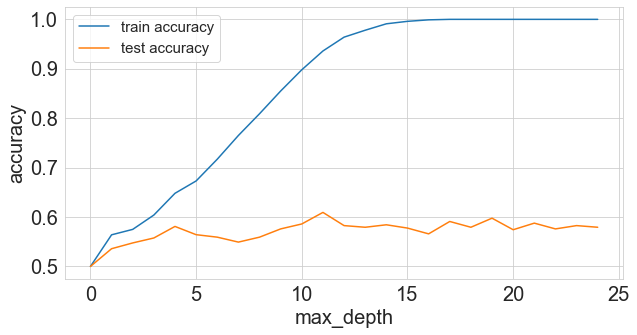

In [18]:
from sklearn import tree
from sklearn import metrics

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

train_accurcies = [0.5]
test_accuracies = [0.5]

for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'sulphates',
    'alcohol']
    clf.fit(df_train[cols], df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    train_accurcies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accurcies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()